In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline
df = pd.read_csv('https://query.data.world/s/bvnjzdpi3pzuqguwbbh3j3gz75j64e')
df.head()

Loading BokehJS ...

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [30]:
#To identify what variables are included and dcecide which columns to keep or discard
list(df)

#Retriving only required columns
df1 = df.drop(columns=['movie_imdb_link','num_critic_for_reviews', 'aspect_ratio', 'plot_keywords', 'num_user_for_reviews', 'num_voted_users'])

#Change column names
df2= df1.rename(columns={'title_year': 'Release_year'})
list (df2)

['color',
 'director_name',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'language',
 'country',
 'content_rating',
 'budget',
 'Release_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes']

In [90]:
print(df2[['movie_title']][df2.gross == df2.gross.max()])

dfyear = df2.groupby('Release_year')['movie_title'].count()
print(dfyear)

df2.corr()

  movie_title
0     Avatar 
260


,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,budget,Release_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
duration,1.000000,0.173296,0.123558,0.088449,0.250298,0.123074,0.013469,0.074276,-0.135038,0.131673,0.261662,0.196605
director_facebook_likes,0.173296,1.000000,0.120199,0.090723,0.144945,0.119549,-0.041268,0.021090,-0.063820,0.119601,0.170802,0.162048
actor_3_facebook_likes,0.123558,0.120199,1.000000,0.249927,0.308026,0.473920,0.099368,0.047451,0.096137,0.559662,0.052633,0.278844
actor_1_facebook_likes,0.088449,0.090723,0.249927,1.000000,0.154468,0.951661,0.072257,0.022639,0.086873,0.390487,0.076099,0.135348
gross,0.250298,0.144945,0.308026,0.154468,1.000000,0.247400,-0.027755,0.102179,0.030886,0.262768,0.198021,0.378082
cast_total_facebook_likes,0.123074,0.119549,0.473920,0.951661,0.247400,1.000000,0.091475,0.036557,0.109971,0.628404,0.085787,0.209786
facenumber_in_poster,0.013469,-0.041268,0.099368,0.072257,-0.027755,0.091475,1.000000,-0.019559,0.061504,0.071228,-0.062958,0.008918
budget,0.074276,0.021090,0.047451,0.022639,0.102179,0.036557,-0.019559,1.000000,0.045726,0.044236,0.030688,0.062039
Release_year,-0.135038,-0.063820,0.096137,0.086873,0.030886,0.109971,0.061504,0.045726,1.000000,0.101890,-0.209167,0.218678
actor_2_facebook_likes,0.131673,0.119601,0.559662,0.390487,0.262768,0.628404,0.071228,0.044236,0.101890,1.000000,0.083808,0.243487


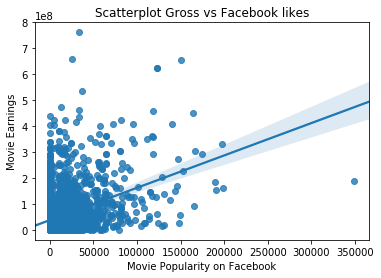

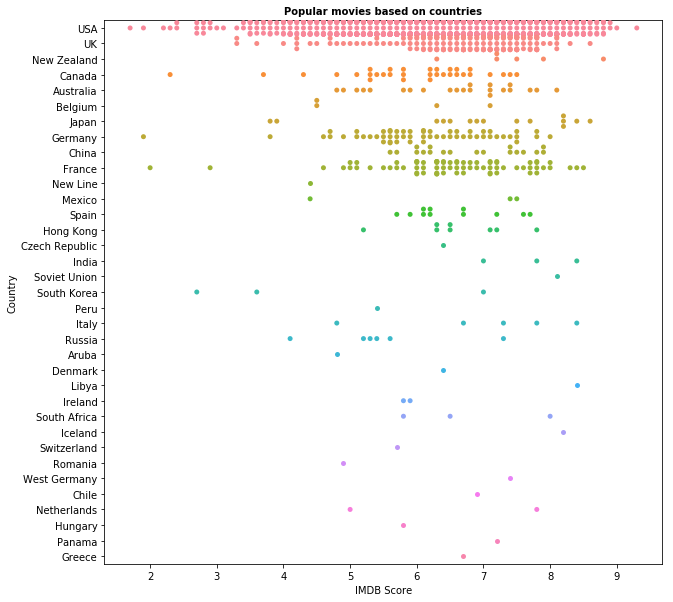

In [82]:
#Scatterplot using seaborn
sns.regplot(x="movie_facebook_likes", y="gross", data=df2)
plt.title('Scatterplot Gross vs Facebook likes')
plt.xlabel('Movie Popularity on Facebook')
plt.ylabel('Movie Earnings')
#slicing data for convenience of plotting
df2_sliced = df2[0:2500]
#Plotting popularity of movies based on countries
plt.figure(figsize=(10,10))
sns.swarmplot(x='imdb_score', y='country', data = df2_sliced)
plt.title ('Popular movies based on countries', fontsize=10, fontweight='bold')
plt.xlabel('IMDB Score')
plt.ylabel('Country')
plt.show()